In [47]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rcParams
from matplotlib import patches
import scipy.io
import astropy.constants as const
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
import fitting_template
import importlib
#from IPython.display import display, Math
from astropy.modeling import models, fitting, Fittable1DModel, Parameter
from scipy.optimize import curve_fit
importlib.reload(fitting_template)
import fitting_template
from fitting_template import FeXII_fit
from fitting_template import myGaussian1D
from fitting_template import myVoigt1D
import pandas as pd
from scipy.integrate import simps
import h5py
from scipy.optimize import curve_fit
plt.style.use('science')
rcParams['axes.linewidth'] = 1.2
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'cm'
#rcParams['figure.dpi']= 72
import sunpy
import sunpy.map
xrtmap = plt.get_cmap("hinodexrt")
import corner

In [2]:
sumer_spec = scipy.io.readsav("../save/sumer_merg.sav",verbose=False)["int_merg"]

In [3]:
line_list_338 = pd.read_csv('../save/338_line_id.csv',skiprows=0,sep=",",encoding='utf-8',skipfooter=0,dtype={'':np.float64})
line_list_375 = pd.read_csv('../save/375_line_id.csv',skiprows=0,sep=",",encoding='utf-8',skipfooter=0,dtype={'':np.float64})
line_list_509 = pd.read_csv('../save/509_line_id.csv',skiprows=0,sep=",",encoding='utf-8',skipfooter=0,dtype={'':np.float64})
line_list_607 = pd.read_csv('../save/607_line_id.csv',skiprows=0,sep=",",encoding='utf-8',skipfooter=0,dtype={'':np.float64})

In [4]:
sumer_spec.shape

(300, 4096)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


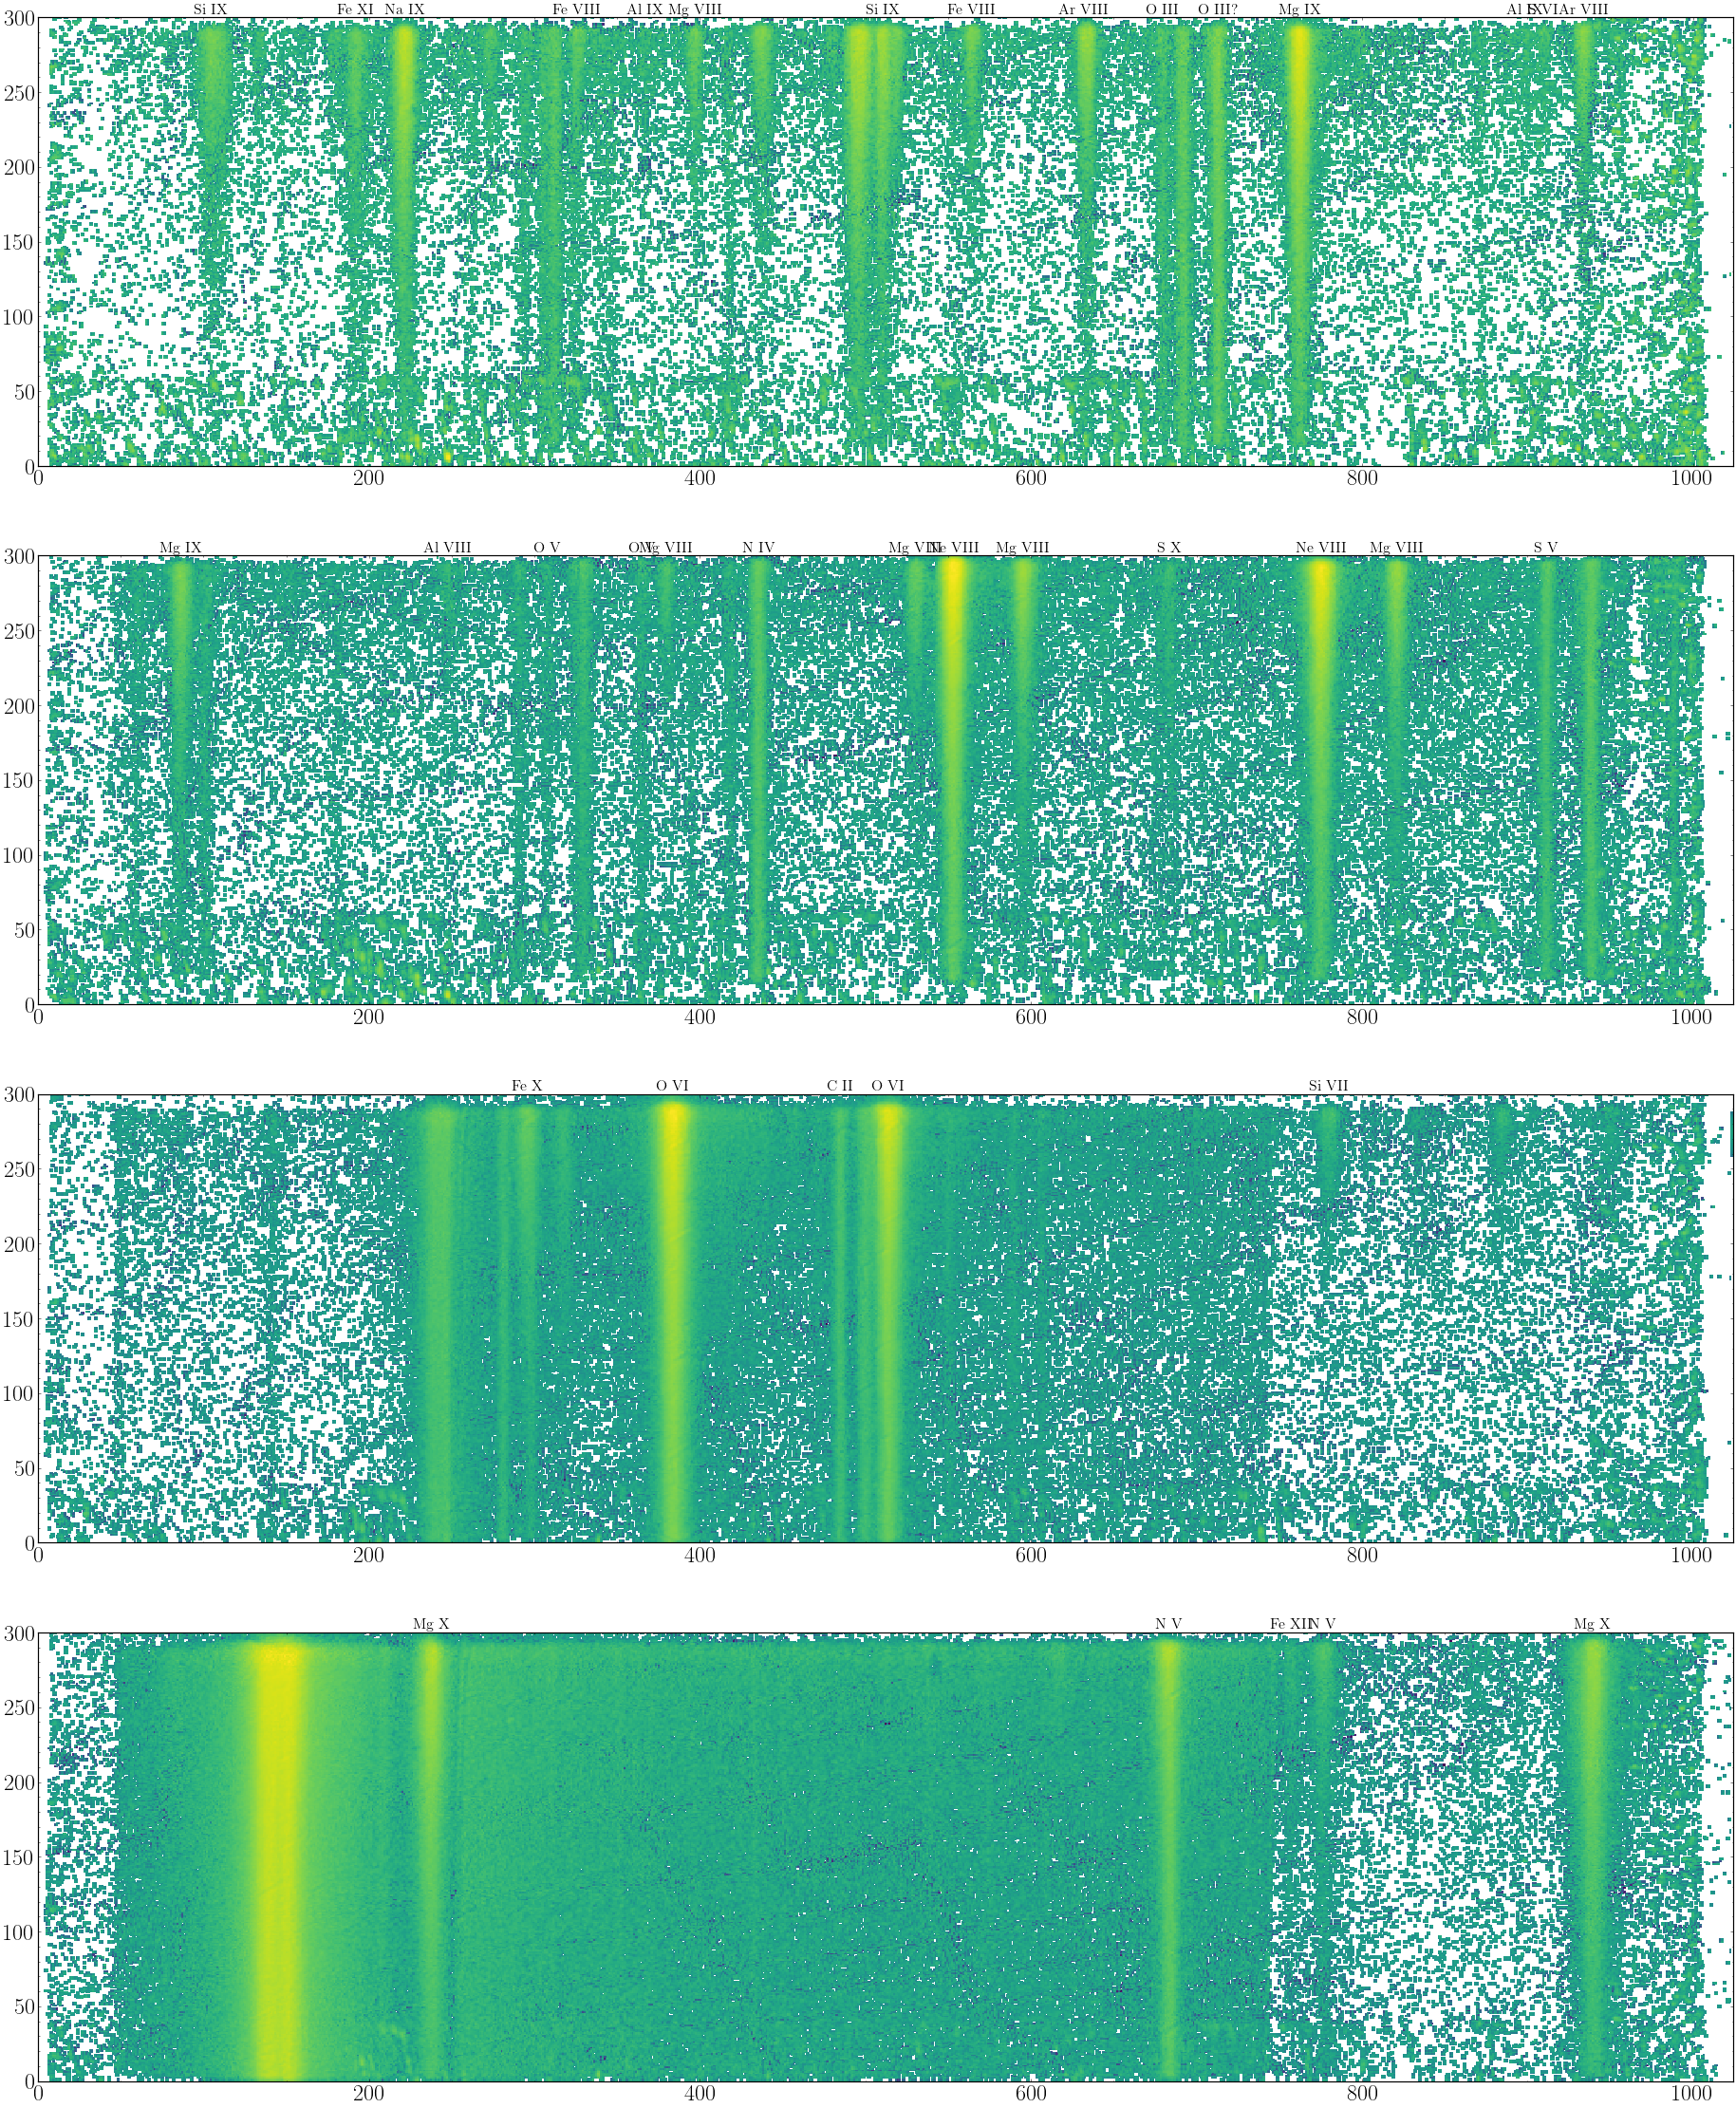

In [5]:
fig,axes = plt.subplots(4,1,figsize=(32,40))
axes[0].pcolormesh(np.log10(sumer_spec[:,0:1024]))
axes[1].pcolormesh(np.log10(sumer_spec[:,1024:2048]))
axes[2].pcolormesh(np.log10(sumer_spec[:,2048:3072]))
axes[3].pcolormesh(np.log10(sumer_spec[:,3072:4096]))

for ii, line_id in enumerate(line_list_338["line_id"]):
    axes[0].text(line_list_338["pix_ref"][ii],305,line_id,ha = 'center',va = 'center', color = 'black',
                 fontsize = 16,linespacing=1.5)
    
for ii, line_id in enumerate(line_list_375["line_id"]):
    axes[1].text(line_list_375["pix_ref"][ii],305,line_id,ha = 'center',va = 'center', color = 'black',
                 fontsize = 16,linespacing=1.5)
for ii, line_id in enumerate(line_list_509["line_id"]):
    axes[2].text(line_list_509["pix_ref"][ii],305,line_id,ha = 'center',va = 'center', color = 'black',
                 fontsize = 16,linespacing=1.5)
for ii, line_id in enumerate(line_list_607["line_id"]):
    axes[3].text(line_list_607["pix_ref"][ii],305,line_id,ha = 'center',va = 'center', color = 'black',
                 fontsize = 16,linespacing=1.5)
for ax_ in axes:
    ax_.tick_params(labelsize=24)

In [6]:
#A function to average every N rows...
def avg_new(my_array, N=2):
    return ma.mean(my_array.reshape(-1,N,my_array.shape[-1]),axis=1)

def avg_err(my_array, N=2):
    my_reshape_sq = np.square(my_array.reshape(-1,N,my_array.shape[-1]))
    mask_reshape_sq = np.logical_not(my_reshape_sq.mask) * 1
    return np.sqrt(ma.sum(my_reshape_sq, axis = 1))/ma.sum(mask_reshape_sq, axis = 1)

In [7]:
FeXI_680 = sumer_spec[:,192-22:192+16]
NaIX_681 = sumer_spec[:,222-14:222+14]
FeVIII_686 = sumer_spec[:,326-7:326+14]
MgVIII_689 = sumer_spec[:,397-14:397+14]
FeVIII_697 = sumer_spec[:,564-14:564+14]
#ArVIII_700 = sumer_spec[:,632-14:632+14] #blend
OIII_703 = sumer_spec[:,712-10:712+10]
MgIX_706 = sumer_spec[:,763-14:763+14]
ArVIII_713 = sumer_spec[:,934-14:934+14]

MgIX_749 = sumer_spec[:,1023+87-14:1023+87+14]
MgVIII_762 = sumer_spec[:,1023+380-10:1023+380+14]
NIV_765 = sumer_spec[:,1023+435-14:1023+435+14]
#MgVIII_769 = sumer_spec[:,1023+530-14:1023+530+11] red wing blended with Ne VIII
NeVIII_770 = sumer_spec[:,1023+553-10:1023+553+14]
MgVIII_772 = sumer_spec[:,1023+595-14:1023+595+14]
SX_776 = sumer_spec[:,1023+683-14:1023+683+14]
NeVIII_780 = sumer_spec[:,1023+775-14:1023+775+14]
MgVIII_782 = sumer_spec[:,1023+821-14:1023+821+14]
SV_786 = sumer_spec[:,1023+912-14:1023+912+14]

FeX_1028 = sumer_spec[:,2047+296-10:2047+296+14]
OVI_1032 = sumer_spec[:,2047+360:2047+400]
CII_1036 = sumer_spec[:,2047+484-14:2047+484+10]
OVI_1037 = sumer_spec[:,2047+513-16:2047+513+20]
SiVII_1049 = sumer_spec[:,2047+780-14:2047+780+14]

MgX_609 = sumer_spec[:,3071+238-25:3071+238+25]
NV_1238 = sumer_spec[:,3071+683-25:3071+683+25]
FeXII_1242 = sumer_spec[:,3071+756-5:3071+756+15]
NV_1242 = sumer_spec[:,3071+776-14:3071+776+25]
MgX_625 = sumer_spec[:,3071+939-25:3071+939+25]
OVI_1032_aver4 = avg_new(OVI_1032,4)

In [8]:
%store -r wvl_all

In [9]:
wvl_FeXI_680 = wvl_all[192-22:192+16]
wvl_FeVIII_697 = wvl_all[564-14:564+14]

In [10]:
def integrate_profile(spectrum,cont_num):
    if cont_num > 0:
        int_spectrum = simps(y=spectrum,axis=1) - np.mean(spectrum[:,:cont_num],axis=1)*((spectrum.shape)[1])
    if cont_num < 0:
        int_spectrum = simps(y=spectrum,axis=1) - np.mean(spectrum[:,cont_num:],axis=1)*((spectrum.shape)[1])
    return int_spectrum

In [11]:
int_FeXI_680 = integrate_profile(FeXI_680,-4)
int_NaIX_681 = integrate_profile(NaIX_681,-5)
int_FeVIII_686 = integrate_profile(FeVIII_686,-6)
int_MgVIII_689 = integrate_profile(MgVIII_689,-5)
int_FeVIII_697 = integrate_profile(FeVIII_697,-4)
int_OIII_703 = integrate_profile(OIII_703,-2)
int_MgIX_706 = integrate_profile(MgIX_706,-4)
int_ArVIII_713 = integrate_profile(ArVIII_713,-4)


In [12]:
np.sum(FeXI_680,axis=1)[0]

0.01195308980337965

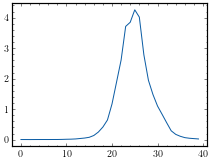

In [13]:
plt.plot(np.mean(OVI_1032[-21:-10,:],axis=0))

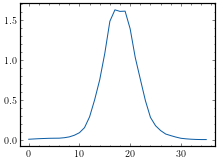

In [14]:
plt.plot(np.mean(OVI_1037[-21:-10,:],axis=0))

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


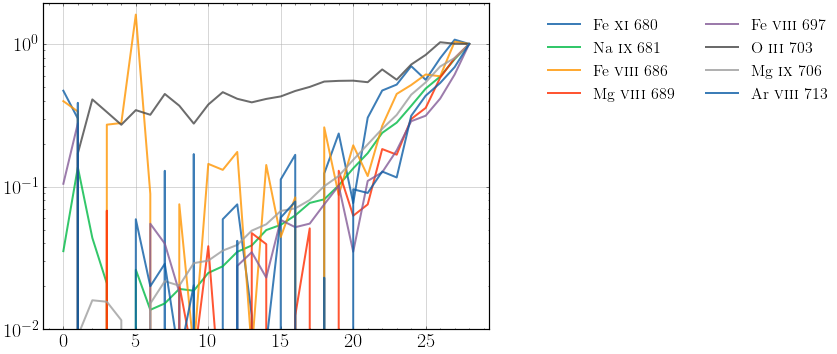

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.mean(int_FeXI_680[:-10].reshape(29,10),axis=1)/np.mean(int_FeXI_680[-20:-10]),lw=2,label=r"Fe \textsc{xi} 680",alpha=0.8)
ax.plot(np.mean(int_NaIX_681[:-10].reshape(29,10),axis=1)/np.mean(int_NaIX_681[-20:-10]),lw=2,label=r"Na \textsc{ix} 681",alpha=0.8)
ax.plot(np.mean(int_FeVIII_686[:-10].reshape(29,10),axis=1)/np.mean(int_FeVIII_686[-20:-10]),lw=2,label=r"Fe \textsc{viii} 686",alpha=0.8)
ax.plot(np.mean(int_MgVIII_689[:-10].reshape(29,10),axis=1)/np.mean(int_MgVIII_689[-20:-10]),lw=2,label=r"Mg \textsc{viii} 689",alpha=0.8)
ax.plot(np.mean(int_FeVIII_697[:-10].reshape(29,10),axis=1)/np.mean(int_FeVIII_697[-20:-10]),lw=2,label=r"Fe \textsc{viii} 697",alpha=0.8)
ax.plot(np.mean(int_OIII_703[:-10].reshape(29,10),axis=1)/np.mean(int_OIII_703[-20:-10]),lw=2,label=r"O \textsc{iii} 703",alpha=0.8)
ax.plot(np.mean(int_MgIX_706[:-10].reshape(29,10),axis=1)/np.mean(int_MgIX_706[-20:-10]),lw=2,label=r"Mg \textsc{ix} 706",alpha=0.8)
ax.plot(np.mean(int_ArVIII_713[:-10].reshape(29,10),axis=1)/np.mean(int_ArVIII_713[-20:-10]),lw=2,label=r"Ar \textsc{viii} 713",alpha=0.8)

ax.legend(bbox_to_anchor=(1.1,0,1,1), loc="upper left",fontsize = 16,ncol=2)
#ax.set_ylim(bottom=-0.05)
ax.set_ylim(bottom=0.01)
ax.grid("on")
ax.set_yscale("log")
ax.tick_params(labelsize=20)

In [16]:
int_MgIX_749 = integrate_profile(MgIX_749,4)
int_MgVIII_762 = integrate_profile(MgVIII_762,-6)
int_NIV_765 = integrate_profile(NIV_765,-4)
int_NeVIII_770 = integrate_profile(NeVIII_770,-4)
int_MgVIII_772 = integrate_profile(MgVIII_772,5)
int_NeVIII_780 = integrate_profile(NeVIII_780,5)
int_MgVIII_782 = integrate_profile(MgVIII_782,5)
int_SV_786 = integrate_profile(SV_786,5)

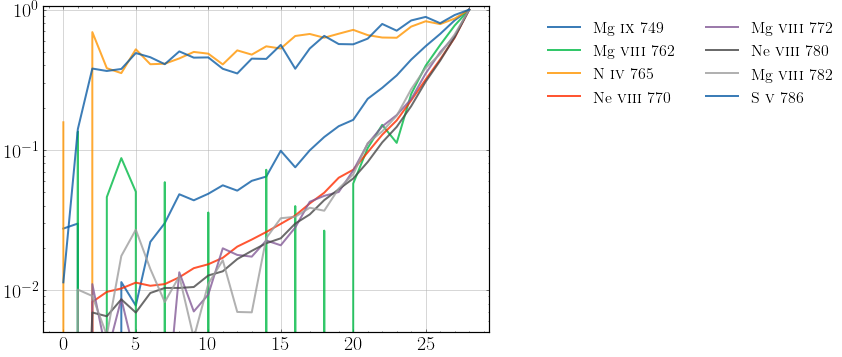

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.mean(int_MgIX_749[:-10].reshape(29,10),axis=1)/np.mean(int_MgIX_749[-20:-10]),lw=2,label=r"Mg \textsc{ix} 749",alpha=0.8)
ax.plot(np.mean(int_MgVIII_762[:-10].reshape(29,10),axis=1)/np.mean(int_MgVIII_762[-20:-10]),lw=2,label=r"Mg \textsc{viii} 762",alpha=0.8)
ax.plot(np.mean(int_NIV_765[:-10].reshape(29,10),axis=1)/np.mean(int_NIV_765[-20:-10]),lw=2,label=r"N \textsc{iv} 765",alpha=0.8)
ax.plot(np.mean(int_NeVIII_770[:-10].reshape(29,10),axis=1)/np.mean(int_NeVIII_770[-20:-10]),lw=2,label=r"Ne \textsc{viii} 770",alpha=0.8)
ax.plot(np.mean(int_MgVIII_772[:-10].reshape(29,10),axis=1)/np.mean(int_MgVIII_772[-20:-10]),lw=2,label=r"Mg \textsc{viii} 772",alpha=0.8)
ax.plot(np.mean(int_NeVIII_780[:-10].reshape(29,10),axis=1)/np.mean(int_NeVIII_780[-20:-10]),lw=2,label=r"Ne \textsc{viii} 780",alpha=0.8)
ax.plot(np.mean(int_MgVIII_782[:-10].reshape(29,10),axis=1)/np.mean(int_MgVIII_782[-20:-10]),lw=2,label=r"Mg \textsc{viii} 782",alpha=0.8)
ax.plot(np.mean(int_SV_786[:-10].reshape(29,10),axis=1)/np.mean(int_SV_786[-20:-10]),lw=2,label=r"S \textsc{v} 786",alpha=0.8)

ax.legend(bbox_to_anchor=(1.1,0,1,1), loc="upper left",fontsize = 16,ncol=2)
ax.set_ylim(bottom=0.01/2)
ax.grid("on")
ax.set_yscale("log")
ax.tick_params(labelsize=20)

In [18]:
int_FeX_1028 = integrate_profile(FeX_1028,-3)
int_CII_1036 = integrate_profile(CII_1036,5)
int_OVI_1037 = integrate_profile(OVI_1037,-5)
int_SiVII_1049 = integrate_profile(SiVII_1049,4)

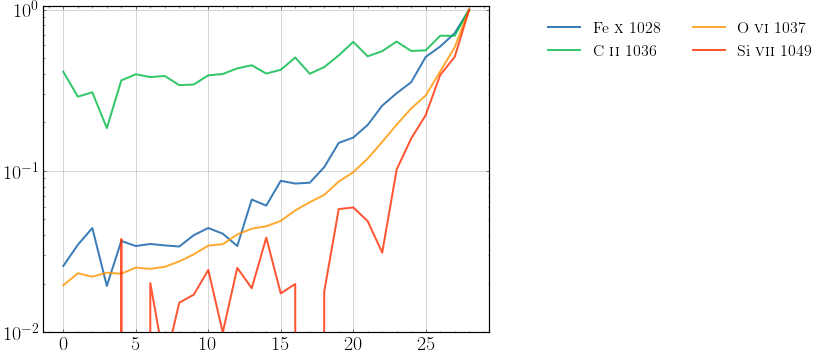

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.mean(int_FeX_1028[:-10].reshape(29,10),axis=1)/np.mean(int_FeX_1028[-20:-10]),lw=2,label=r"Fe \textsc{x} 1028",alpha=0.8)
ax.plot(np.mean(int_CII_1036[:-10].reshape(29,10),axis=1)/np.mean(int_CII_1036[-20:-10]),lw=2,label=r"C \textsc{ii} 1036",alpha=0.8)
ax.plot(np.mean(int_OVI_1037[:-10].reshape(29,10),axis=1)/np.mean(int_OVI_1037[-20:-10]),lw=2,label=r"O \textsc{vi} 1037",alpha=0.8)
ax.plot(np.mean(int_SiVII_1049[:-10].reshape(29,10),axis=1)/np.mean(int_SiVII_1049[-20:-10]),lw=2,label=r"Si \textsc{vii} 1049",alpha=0.8)


ax.legend(bbox_to_anchor=(1.1,0,1,1), loc="upper left",fontsize = 16,ncol=2)
ax.set_ylim(bottom=0.01)
ax.grid("on")
ax.set_yscale("log")
ax.tick_params(labelsize=20)

In [20]:
int_MgX_609 = integrate_profile(MgX_609,10)
int_NV_1238 = integrate_profile(NV_1238,10)
int_NV_1242 = integrate_profile(NV_1242,-10)
int_MgX_625 = integrate_profile(MgX_625,10)

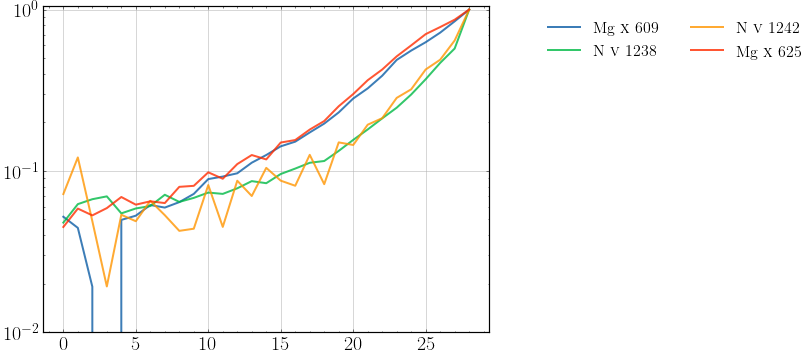

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.mean(int_MgX_609[:-10].reshape(29,10),axis=1)/np.mean(int_MgX_609[-20:-10]),lw=2,label=r"Mg \textsc{x} 609",alpha=0.8)
ax.plot(np.mean(int_NV_1238[:-10].reshape(29,10),axis=1)/np.mean(int_NV_1238[-20:-10]),lw=2,label=r"N \textsc{v} 1238",alpha=0.8)
ax.plot(np.mean(int_NV_1242[:-10].reshape(29,10),axis=1)/np.mean(int_NV_1242[-20:-10]),lw=2,label=r"N \textsc{v} 1242",alpha=0.8)
ax.plot(np.mean(int_MgX_625[:-10].reshape(29,10),axis=1)/np.mean(int_MgX_625[-20:-10]),lw=2,label=r"Mg \textsc{x} 625",alpha=0.8)


ax.legend(bbox_to_anchor=(1.1,0,1,1), loc="upper left",fontsize = 16,ncol=2)
ax.set_ylim(bottom=0.01)
ax.grid("on")
ax.set_yscale("log")
ax.tick_params(labelsize=20)

In [22]:
FeXI_680_aver = avg_new(FeXI_680[-170:-10,:],32)
FeXI_680_test = FeXII_fit(FeXI_680_aver,wvl_FeXI_680,[1,680,0.20,0],err = None,stray_int = 0, 
                      stray_fwhm= 0.05,stray_wvl = 195)
FeXI_680_test.run_lse(ignore_err=True)

FeXI_680_aver_16 = avg_new(FeXI_680[-170:-10,:],16)
FeXI_680_test_16 = FeXII_fit(FeXI_680_aver_16,wvl_FeXI_680,[1,680,0.20,0],err = None,stray_int = 0, 
                      stray_fwhm= 0.05,stray_wvl = 195)
FeXI_680_test_16.run_lse(ignore_err=True)

fwhm_680_bin32_nostray = FeXI_680_test.get_para()[:,2]
fwhm_680_bin32_nostray_err = FeXI_680_test.get_error()[:,2]

0 fit again
1 fit again
2 fit again
3 fit again
4 fit again
0 fit again
1 fit again
2 fit again
3 fit again
4 fit again
5 fit again
7 fit again
8 fit again
9 fit again


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


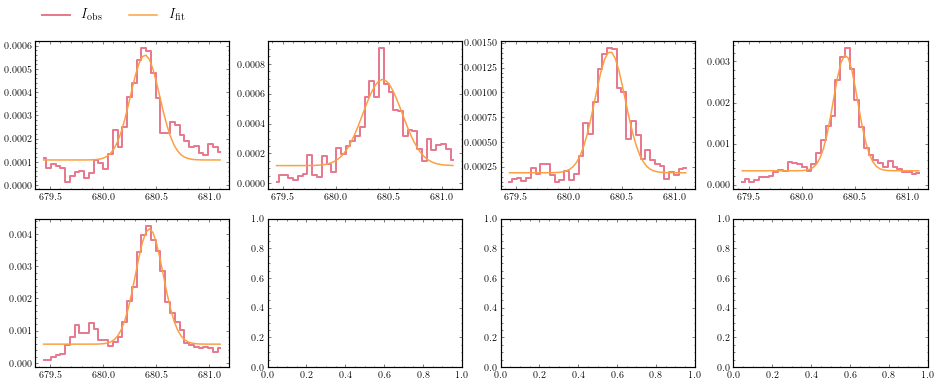

In [24]:
FeXI_680_test.plot()

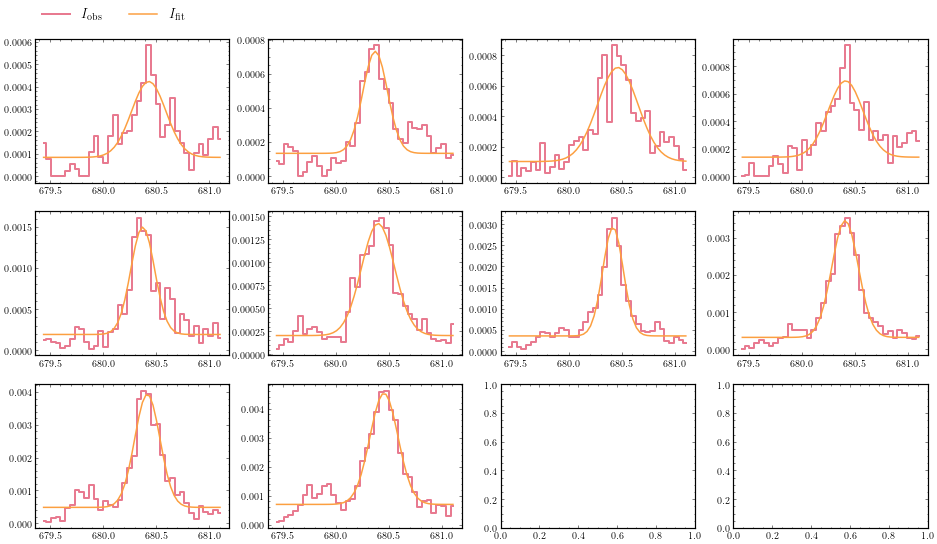

In [25]:
FeXI_680_test_16.plot()

In [26]:
fwhm_680_bin32_nostray

array([0.32592024, 0.43470952, 0.33584019, 0.26889323, 0.30597943])

In [27]:
FeVIII_697_aver = avg_new(FeVIII_697[-170:-10,:],32)
FeVIII_697_test = FeXII_fit(FeVIII_697_aver,wvl_FeVIII_697,[1,680,0.20,0],err = None,stray_int = 0, 
                      stray_fwhm= 0.05,stray_wvl = 195)
FeVIII_697_test.run_lse(ignore_err=True)

FeVIII_697_aver_16 = avg_new(FeVIII_697[-170:-10,:],16)
FeVIII_697_test_16 = FeXII_fit(FeVIII_697_aver_16,wvl_FeVIII_697,[1,680,0.20,0],err = None,stray_int = 0, 
                      stray_fwhm= 0.05,stray_wvl = 195)
FeVIII_697_test_16.run_lse(ignore_err=True)

fwhm_697_bin32_nostray = FeVIII_697_test.get_para()[:,2]
fwhm_697_bin32_nostray_err = FeVIII_697_test.get_error()[:,2]

fwhm_697_bin16_nostray = FeVIII_697_test_16.get_para()[:,2]
fwhm_697_bin16_nostray_err = FeVIII_697_test_16.get_error()[:,2]

1 fit again
4 fit again
1 fit again
8 fit again
9 fit again


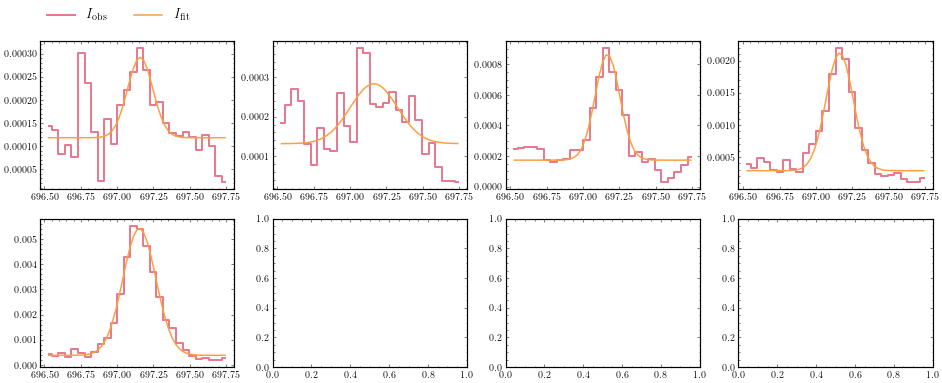

In [28]:
FeVIII_697_test.plot()

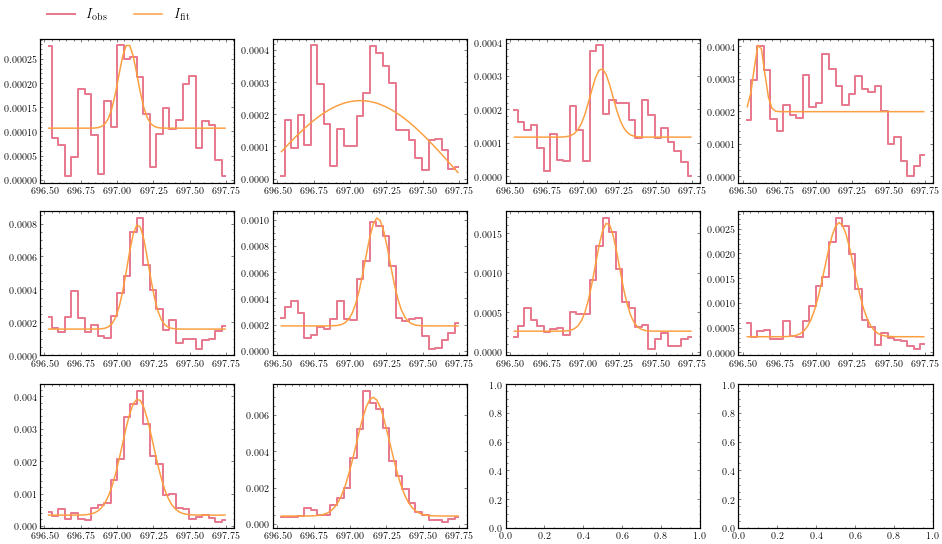

In [29]:
FeVIII_697_test_16.plot()

In [96]:
fwhm_697_bin32_nostray

array([0.20537665, 0.38145638, 0.19953597, 0.2204501 , 0.2666072 ])

In [99]:
fwhm_697_bin32_nostray_err

array([0.0628707 , 0.14146032, 0.01685065, 0.01226517, 0.0080108 ])

In [98]:
fwhm_697_bin16_nostray

array([0.15311659, 1.55390622, 0.18070278, 0.08432994, 0.17269119,
       0.19799816, 0.19343485, 0.23519713, 0.25056592, 0.2741661 ])

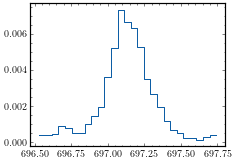

In [34]:
plt.step(wvl_FeVIII_697,FeVIII_697_aver_16[-1,:])

In [36]:
def my_simple_gaussian(x,intensity,mean,fwhm,bg):
    return 2.355*intensity/np.sqrt(2 * np.pi)/fwhm * np.exp((-(1 / (2. * (fwhm/2.355)**2)) * (x - mean)**2)) + bg

In [38]:
popt, pcov = curve_fit(f=my_simple_gaussian,xdata=wvl_FeVIII_697,ydata=FeVIII_697_aver_16[-1,:],p0=[4e-3,697.15,0.2741661,0])

In [51]:
err_diff = np.abs(FeVIII_697_aver_16[-1,:] - my_simple_gaussian(wvl_FeVIII_697,*popt))
n_chain = 10000
random_err = np.zeros((n_chain,28))
for ii in range(28):
    random_err[:,ii] = np.random.normal(0, err_diff[ii], n_chain)

popt_chain = np.zeros((n_chain,4))
for ii in range(n_chain):
    popt_chain[ii,:],_ = curve_fit(f=my_simple_gaussian,xdata=wvl_FeVIII_697,ydata=FeVIII_697_aver_16[-1,:]+random_err[ii,:],p0=popt)

In [58]:
popt_result = np.zeros(4)
popt_result_err = np.zeros((2,4))
for jj in range(4):
    mcmc = np.percentile(popt_chain[:, jj], [50-68/2, 50, 50+68/2])
    q = np.diff(mcmc)
    #print(type(np.array(mcmc[1])))
    popt_result[jj] = mcmc[1]
    popt_result_err[:,jj] = np.array([q[0],q[1]])

NameError: name 'num2tex' is not defined

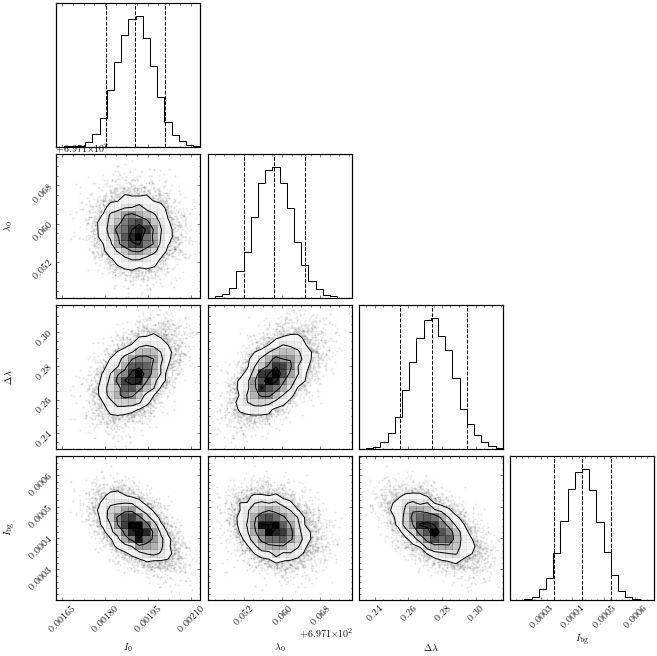

In [59]:
fig = corner.corner(popt_chain,labels=[r"$I_{0}$",r"$\lambda_0$ ",r"$\Delta \lambda$ ",r"$I_{\rm bg}$"],
                   quantiles=[0.05, 0.50, 0.95])
axes = np.array(fig.axes).reshape((4, 4))
axes[0,0].set_title(r'$I_0 = {:.3g}_{{-{:.1g}}}^{{+{:.1g}}}$'.format(num2tex(popt_result[0]),num2tex(popt_result_err[0,0]),num2tex(popt_result_err[1,0])),fontsize=16)
axes[1,1].set_title(r'$\lambda_0 = {:.6g}_{{-{:.1g}}}^{{+{:.1g}}}$'.format(num2tex(popt_result[1]),num2tex(popt_result_err[0,1]),num2tex(popt_result_err[1,1])),
                    fontsize=16)
axes[2,2].set_title(r'$\Delta \lambda = {:.3f}_{{-{:.1g}}}^{{+{:.1g}}}$'.format(num2tex(popt_result[2]),num2tex(popt_result_err[0,2]),num2tex(popt_result_err[1,2])),
                   fontsize=16)
axes[3,3].set_title(r'$I_{{\rm bg}} = {:.2g}_{{-{:.1g}}}^{{+{:.1g}}}$'.format(num2tex(popt_result[3]),num2tex(popt_result_err[0,3]),num2tex(popt_result_err[1,3])),
                   fontsize=16)
for ax_ in axes.flatten():
    ax_.tick_params(labelsize=15)
    ax_.xaxis.label.set_size(16)
    ax_.yaxis.label.set_size(16)
    ax_.yaxis.get_offset_text().set_fontsize(0)
    ax_.xaxis.get_offset_text().set_fontsize(0)